In [103]:
#Logistic Regression
#Loan Approval Yes or No

In [104]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


In [105]:
df=pd.read_csv(r"C:\Users\Lokanathswami\Downloads\Logistic Regression Dummy Data v3.csv")

In [106]:
df.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [107]:
df.shape #Displays in the form of Tuple

(1006, 14)

In [108]:
# Printing In the form of Message
print('No of features:- {} & No of rows:- {}'.format(df.shape[1],df.shape[0]))

No of features:- 14 & No of rows:- 1006


In [109]:
# Displaying all the Columns or Features
df.columns #displays in the form of array of list

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

In [110]:
# Converting array of list into Simple List
# Displaying only features
features=list(df.columns)
features

['Type of Account',
 'Account History',
 'Reason for the Loan',
 'Loan Amount',
 'Account Savings',
 'Employment History',
 'Individual Stauts',
 'Other Loans',
 'Security / Collateral',
 'Age',
 'Residence Status',
 'Job',
 'Completed Other loan?',
 'Good Loan']

In [111]:
#Checking No of Null values in Each Feature
df.isnull().sum() #Displays in the form of Dataframe

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [112]:
# Checking Null Values in detail by each featurewise
df['Employment History'].isnull() # Displays only True False

0       False
1       False
2       False
3       False
4       False
        ...  
1001    False
1002    False
1003    False
1004     True
1005     True
Name: Employment History, Length: 1006, dtype: bool

In [113]:
# Displaying in the form Dataframe
df[df['Employment History'].isnull()] # DIsplays only Null rows in details

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#Dropping all NA rows throught the dataframe
#df.dropna()

#Dropping Na Rows through subset
df=df.dropna(subset=['Employment History'])

In [115]:
df.shape

(1001, 14)

In [116]:
df.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [117]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Type of Account :4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History :3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan :10
The number of values for feature Loan Amount :911
The number of values for feature Account Savings :5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History :5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts :5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans :2 -- ['No' 'Yes']
The number of values for feature Security / Collateral :4 -- ['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle']
The number of values for feature Age :57
The number of values for feature Residence Status :3 -- ['Free' 'House Owner' 'Renting']
The number of values for feature Job :4 -- ['

In [118]:
#There is a outlier in fig(0,1) in feature 'Age'.It is near about more than 300
df[df['Age']>100]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
679,Type C,Good,Home furniture,-548541254.0,No Data,Unemployed,Female_,No,Vehicle,327.0,House Owner,Skilled Labor,Yes,Yes


In [119]:
#from above fig there is also outlier in Loan Amount -548541254.0

In [120]:
# Selecting everything data except age colm having more than 100.
#it selct entire dataframe along with age colm having values upto 99
df=df[df['Age']<100]

In [121]:
df.shape

(1000, 14)

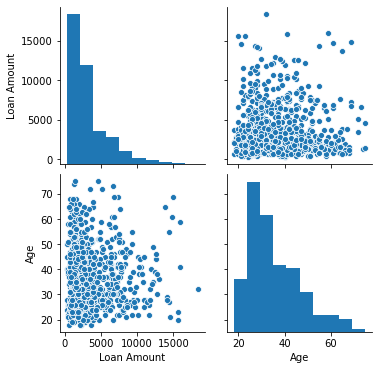

In [122]:
g = sns.pairplot(df) #to see outlier

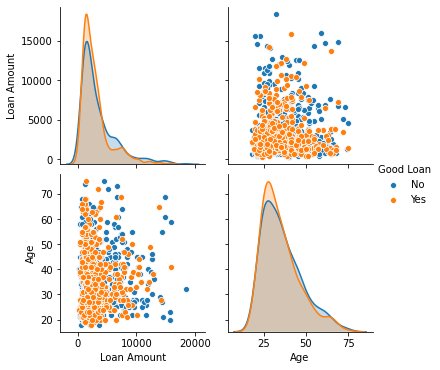

In [123]:
# Visualize the data using seaborn Pairplots
#it plots only for Numerical features
g = sns.pairplot(df,hue='Good Loan') 


No     536
Yes    464
Name: Good Loan, dtype: int64

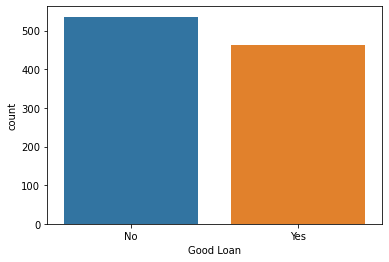

In [124]:
#Checking Distribution of Dependent Variable
# Checking dataset is balanced or imbalanced
sns.countplot(x='Good Loan',data=df)
df['Good Loan'].value_counts()

In [125]:
features=list(df.columns)
features

['Type of Account',
 'Account History',
 'Reason for the Loan',
 'Loan Amount',
 'Account Savings',
 'Employment History',
 'Individual Stauts',
 'Other Loans',
 'Security / Collateral',
 'Age',
 'Residence Status',
 'Job',
 'Completed Other loan?',
 'Good Loan']

In [126]:
#remove Two Numerical columns Loan Amount & age also Dependent Variable
features=['Type of Account',
 'Account History',
 'Reason for the Loan',
 'Account Savings',
 'Employment History',
 'Individual Stauts',
 'Other Loans',
 'Security / Collateral',
 'Residence Status',
 'Job',
 'Completed Other loan?'
 ]

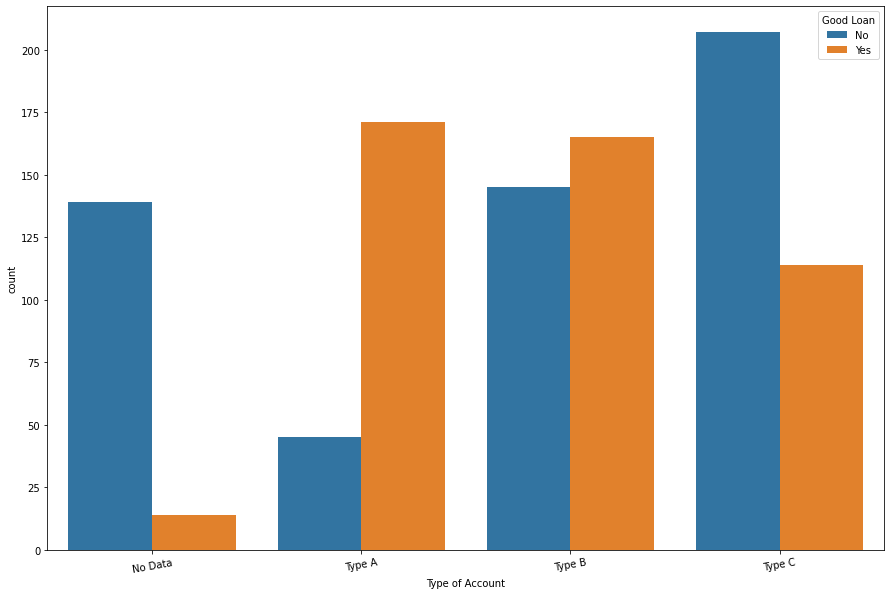

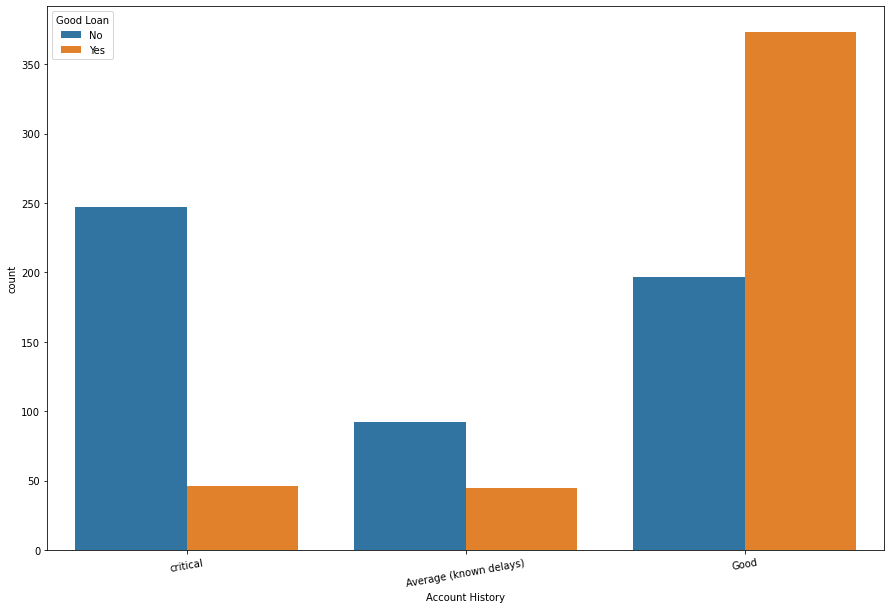

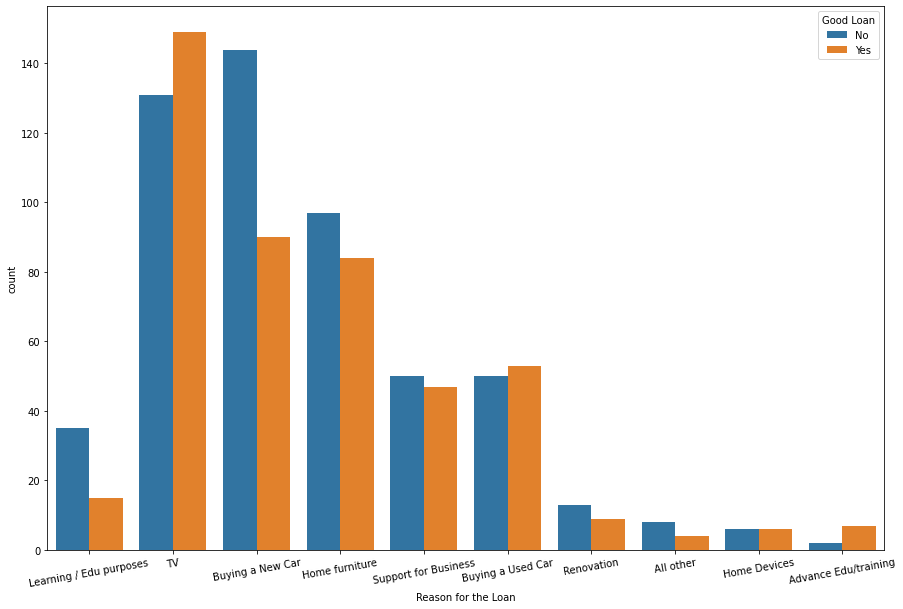

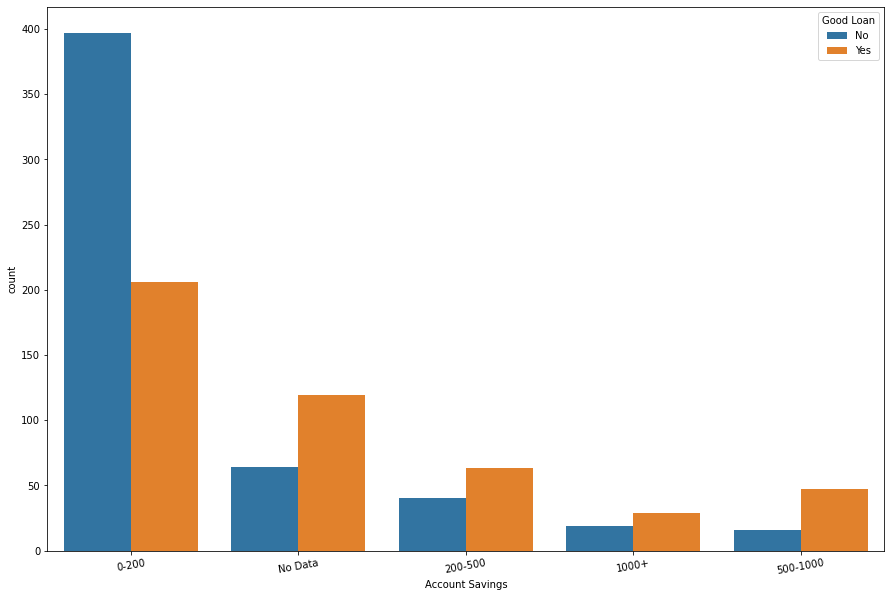

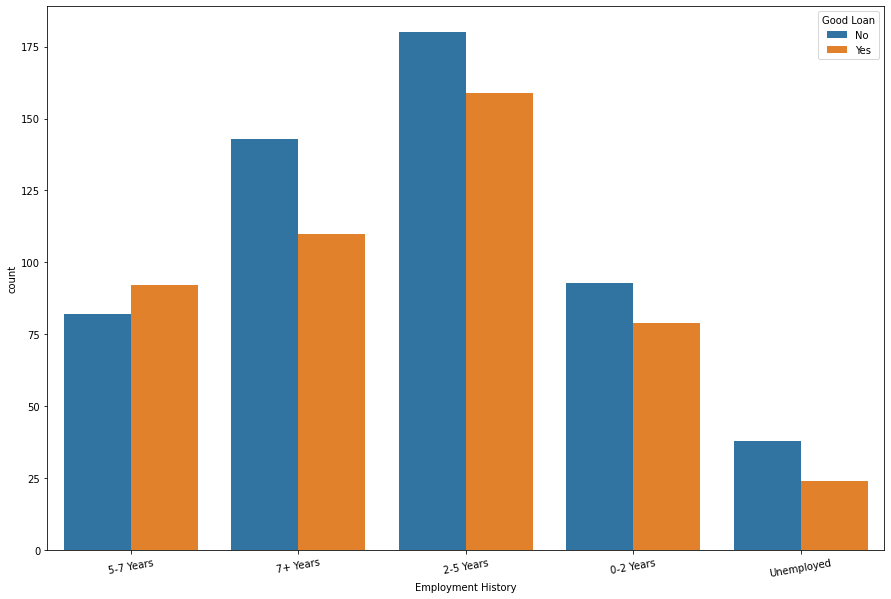

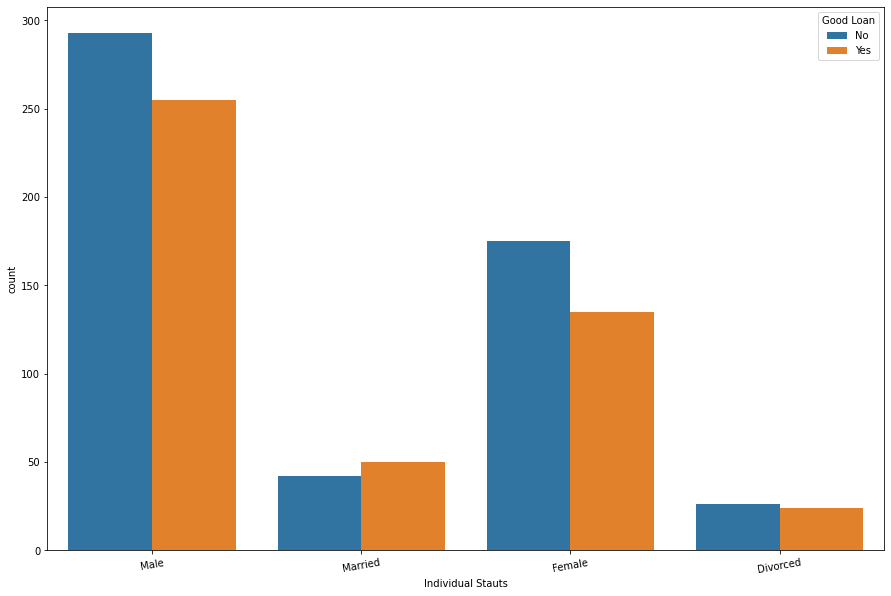

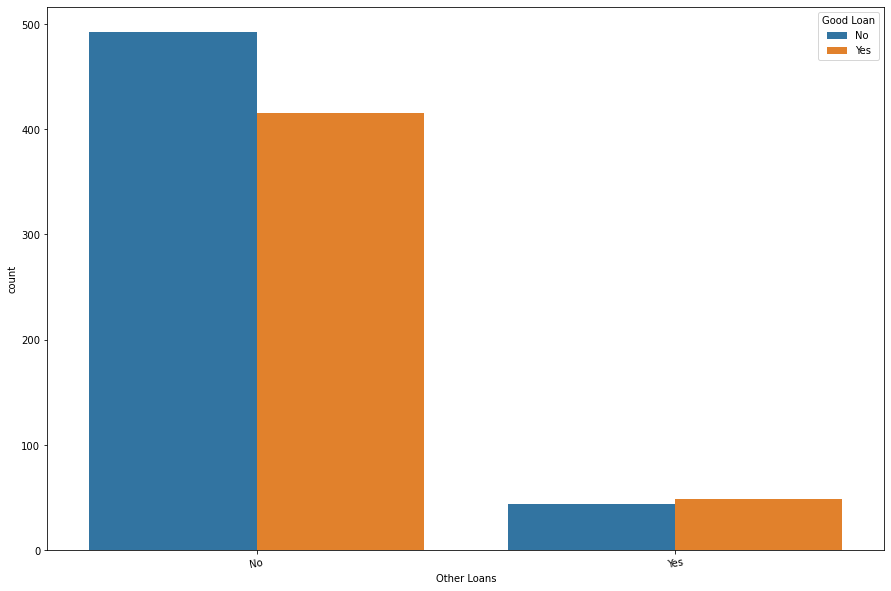

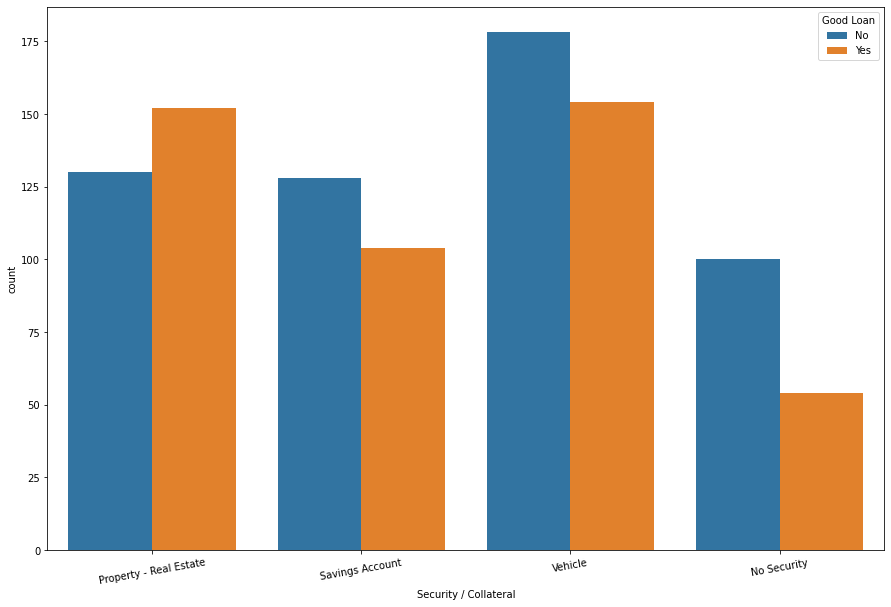

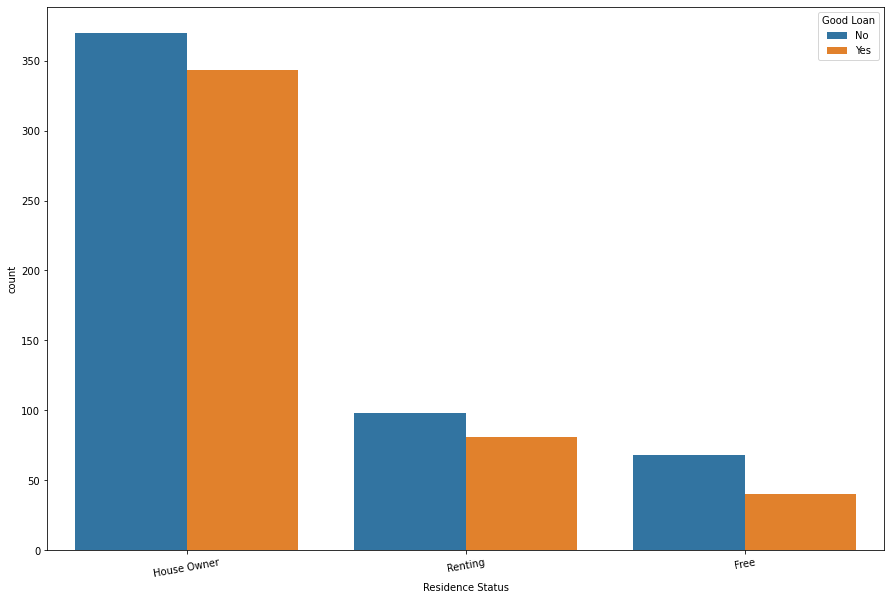

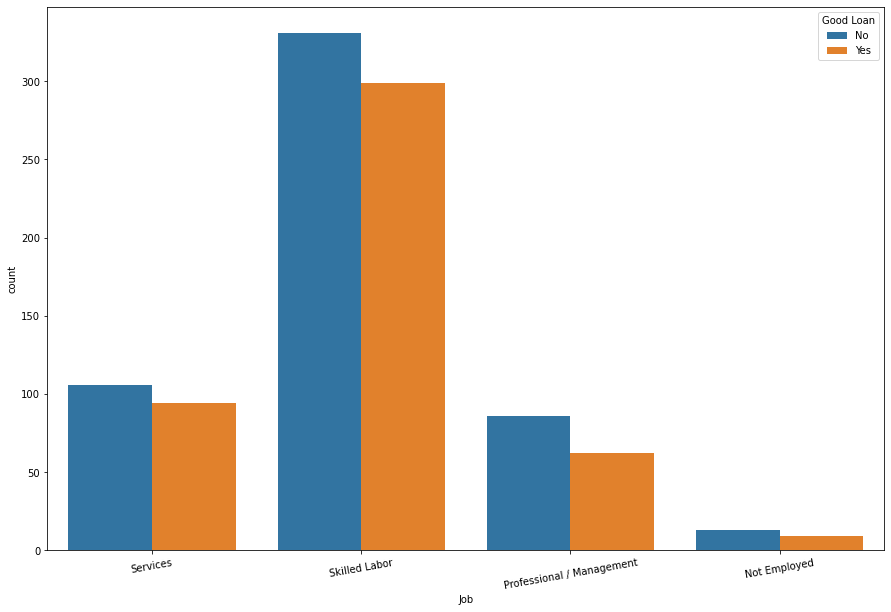

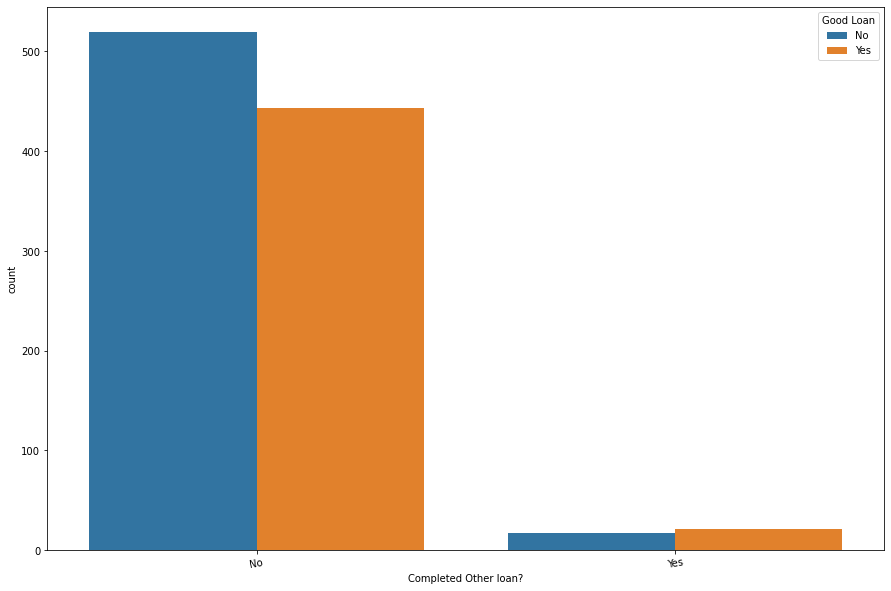

In [127]:
#Checking each variables relationship w.r.t dependent variable
for f in features:
    fig= plt.figure(figsize=(15,10))
    sns.countplot(x=f,data=df,hue='Good Loan')
    plt.xticks(rotation=10)
    plt.show()
        
        


In [128]:
df.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [129]:
#Handling  Categorical features
#Just for Understanding get_dummies
#pd.get_dummies(df,columns=['Type of Account'])
#Comment this otherwise in next applying for entire dataframe shape of dataframe incerases

In [130]:
#Type of Account :4 lebels -- ['No Data' 'Type A' 'Type B' 'Type C']
#applying get dummies original features is get converted into No of lebels present in that feature with one hot encoding
#New feature Nomencleture will be like original feature name_lebel Name

In [131]:
#Handling Categorical feature by get_dummies for entire dataframe categorical feature
#Numeric Representation of 0 & 1
encoded_df=pd.get_dummies(df,columns=features)
encoded_df

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,No,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,No,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,No,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,Yes,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,No,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [132]:
# From above Two are Numerical features & one is Dependent feature which are excludede from get_dummies

In [133]:
print(df.shape)
print(encoded_df.shape)

(1000, 14)
(1000, 49)


In [134]:
# Handling dependent Variable lebels with 0 and 1.We cannot apply get_dummies for Dependent feature
#wherever Yes put 1 & wherever No Put 0
encoded_df['Good Loan'][encoded_df['Good Loan']=='Yes']=1
encoded_df['Good Loan'][encoded_df['Good Loan']=='No']=0

encoded_df

C:\Users\Lokanathswami\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lokanathswami\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [135]:
#Feature selection
#Selecting Most Important feature for further process
# based on how much feature contribute to y variable
# Steps
  # split dataframe in X & Y
  #Run a Tree based estimators like (Decision Trees & Random Forest)

In [136]:
X=encoded_df.drop('Good Loan',axis=1)

X.head()

,Loan Amount,Age,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [137]:
X=encoded_df.drop('Good Loan',axis=1).values  #.values for getting vector
X

array([[2.1160e+03, 4.7000e+01, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.4380e+03, 5.2000e+01, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.1440e+03, 4.8000e+01, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.2759e+04, 3.8000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.5510e+03, 4.7000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.5870e+03, 3.5000e+01, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [138]:
Y=encoded_df['Good Loan']

Y

0       0
1       0
2       0
3       0
4       0
       ..
999     0
1000    0
1001    1
1002    0
1003    1
Name: Good Loan, Length: 1000, dtype: object

In [139]:
Y=Y.astype(int)
Y

0       0
1       0
2       0
3       0
4       0
       ..
999     0
1000    0
1001    1
1002    0
1003    1
Name: Good Loan, Length: 1000, dtype: int32

In [140]:
print(X.shape)
print(Y.shape)

(1000, 48)
(1000,)


In [141]:
model=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)#max_depth to avoid overfitting
model.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [142]:
for i,column in enumerate(encoded_df.drop('Good Loan',axis=1)):
   print('The feature importance for {} is: {}'.format(column, model.feature_importances_[i]))

The feature importance for Loan Amount is: 0.12122079844891431
The feature importance for Age is: 0.07962988068108864
The feature importance for Type of Account_No Data is: 0.054236275712355064
The feature importance for Type of Account_Type A is: 0.04973253970745607
The feature importance for Type of Account_Type B is: 0.0
The feature importance for Type of Account_Type C is: 0.026698167265803152
The feature importance for Account History_Average (known delays) is: 0.0026219295620499047
The feature importance for Account History_Good is: 0.19131616315491018
The feature importance for Account History_critical is: 0.0
The feature importance for Reason for the Loan_Advance Edu/training is: 0.0
The feature importance for Reason for the Loan_All other is: 0.0
The feature importance for Reason for the Loan_Buying a New Car is: 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is: 0.00657340597791024
The feature importance for Reason for the Loan_Home Devi

In [143]:
# Displaying in Dataframe format with Column Name & its feature importance value
column_Name=[] #Name of Feature
fi_score=[] #Feature importance Score

for i,column in enumerate(encoded_df.drop('Good Loan',axis=1)):
    print('The feature importance for {} is: {}'.format(column, model.feature_importances_[i]))
    
    
    column_Name.append(column)
    fi_score.append(model.feature_importances_[i])
   
    



The feature importance for Loan Amount is: 0.12122079844891431
The feature importance for Age is: 0.07962988068108864
The feature importance for Type of Account_No Data is: 0.054236275712355064
The feature importance for Type of Account_Type A is: 0.04973253970745607
The feature importance for Type of Account_Type B is: 0.0
The feature importance for Type of Account_Type C is: 0.026698167265803152
The feature importance for Account History_Average (known delays) is: 0.0026219295620499047
The feature importance for Account History_Good is: 0.19131616315491018
The feature importance for Account History_critical is: 0.0
The feature importance for Reason for the Loan_Advance Edu/training is: 0.0
The feature importance for Reason for the Loan_All other is: 0.0
The feature importance for Reason for the Loan_Buying a New Car is: 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is: 0.00657340597791024
The feature importance for Reason for the Loan_Home Devi

In [144]:
column_Name
fi_score
feature_importance_df=zip(column_Name,fi_score)
feature_importance_df=pd.DataFrame(feature_importance_df,columns=['Feature','fi_score'])

feature_importance_df



,Feature,fi_score
0,Loan Amount,0.121221
1,Age,0.079630
2,Type of Account_No Data,0.054236
3,Type of Account_Type A,0.049733
4,Type of Account_Type B,0.000000
5,Type of Account_Type C,0.026698
6,Account History_Average (known delays),0.002622
7,Account History_Good,0.191316
8,Account History_critical,0.000000
9,Reason for the Loan_Advance Edu/training,0.000000


In [145]:
feature_importance_df=feature_importance_df.sort_values('fi_score',ascending=False).reset_index()
feature_importance_df
#displays new index and old indexs

,index,Feature,fi_score
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


In [146]:
#upto index no 39 features are contributuing but after index no 39 features doenot contribute anything
#selecting only important features based on index no
selected_features=feature_importance_df['Feature'][0:40] #selcts 0 to 39
selected_features

0                            Account Savings_0-200
1                             Account History_Good
2                                      Loan Amount
3                                              Age
4                          Type of Account_No Data
5                           Type of Account_Type A
6                           Type of Account_Type C
7                                Job_Skilled Labor
8                                  Other Loans_Yes
9                          Account Savings_No Data
10        Reason for the Loan_Support for Business
11                          Reason for the Loan_TV
12                           Account Savings_1000+
13    Security / Collateral_Property - Real Estate
14            Reason for the Loan_Buying a New Car
15                                    Job_Services
16                    Residence Status_House Owner
17                    Employment History_0-2 Years
18              Reason for the Loan_Home furniture
19                         Acco

In [147]:
#No need to standerding data while logistic Regression

In [148]:
print(encoded_df.shape)
print(encoded_df[selected_features].shape)

(1000, 49)
(1000, 40)


In [149]:
#Making two X and Y Dataframes
X=encoded_df[selected_features]

X

,Account Savings_0-200,Account History_Good,Loan Amount,Age,Type of Account_No Data,Type of Account_Type A,Type of Account_Type C,Job_Skilled Labor,Other Loans_Yes,Account Savings_No Data,...,Job_Professional / Management,Completed Other loan?_No,Completed Other loan?_Yes,Reason for the Loan_Learning / Edu purposes,Individual Stauts_Male,Employment History_7+ Years,Security / Collateral_Savings Account,Individual Stauts_Female,Account History_Average (known delays),Residence Status_Renting
0,1,0,2116.0,47.0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1,0,0,2438.0,52.0,1,0,0,1,0,1,...,0,1,0,0,1,1,1,0,0,0
2,1,0,2144.0,48.0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,2073.0,25.0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1276.0,59.0,1,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1,0,3602.0,47.0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0
1000,1,0,4473.0,35.0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1001,0,0,12759.0,38.0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
1002,1,0,2551.0,47.0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0


In [150]:
#Converting into Numpy Arrays i.e into integer values
X=encoded_df[selected_features].values
X

array([[1.0000e+00, 0.0000e+00, 2.1160e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 2.4380e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 2.1440e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.2759e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 2.5510e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 1.5870e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [151]:
encoded_df.head()

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [152]:
Y=encoded_df['Good Loan']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Good Loan, dtype: object

In [153]:
# Changing Object dtype to Int
Y=Y.astype(int)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Good Loan, dtype: int32

In [154]:
print(X.shape)
print(Y.shape)

(1000, 40)
(1000,)


In [155]:
#Splitting X & Y dataframes into Training & Testing Dataframes 4 subsets
#For Trainging before hyperparameter tunning
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=15)
#For After hyperparameter Tunning ,Total Unseen Data
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train, test_size=0.1,random_state=15)

In [156]:
print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

print(y_train.shape)
print(y_test.shape)
print(y_validate.shape)


(720, 40)
(200, 40)
(80, 40)
(720,)
(200,)
(80,)


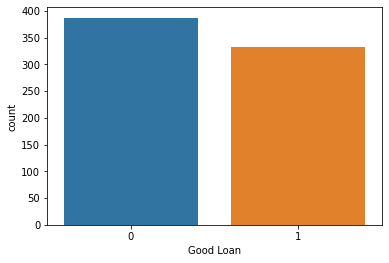

In [157]:
#Checking Distribution Of Y
ax=sns.countplot(x=y_train)

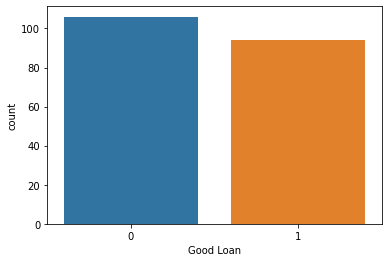

In [158]:
ax=sns.countplot(x=y_test)

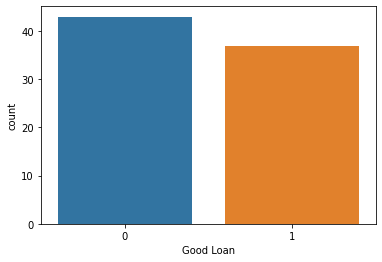

In [159]:
ax=sns.countplot(x=y_validate)

In [160]:
# All y-train.y_test and y_validate distributions are OK

In [161]:
#Logistic Regression is used for Binary prediction Not for Contineous value prediction 
#instead of linear regresiion we use logistic regression for good fit of data

In [162]:
#Checking default Parameters of logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=10,solver='lbfgs')
model.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [163]:
y_predicted=model.predict(x_train)
y_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [164]:
# o=Bad Loan  & 1=Good Loan

In [165]:
model.predict(x_train).shape

(720,)

In [166]:
predicted_training_proba=model.predict_proba(x_train)
predicted_training_proba

array([[0.6336635 , 0.3663365 ],
       [0.86178827, 0.13821173],
       [0.29264276, 0.70735724],
       ...,
       [0.84040785, 0.15959215],
       [0.92392387, 0.07607613],
       [0.09262042, 0.90737958]])

In [167]:
predicted_testing_proba=model.predict_proba(x_test)
predicted_testing_proba

array([[0.14873311, 0.85126689],
       [0.79699251, 0.20300749],
       [0.59926042, 0.40073958],
       [0.37470906, 0.62529094],
       [0.97725139, 0.02274861],
       [0.72273245, 0.27726755],
       [0.45231341, 0.54768659],
       [0.23199975, 0.76800025],
       [0.28871095, 0.71128905],
       [0.76116368, 0.23883632],
       [0.74252882, 0.25747118],
       [0.93037938, 0.06962062],
       [0.8599564 , 0.1400436 ],
       [0.87029376, 0.12970624],
       [0.23890492, 0.76109508],
       [0.23217944, 0.76782056],
       [0.93868727, 0.06131273],
       [0.30142946, 0.69857054],
       [0.97212116, 0.02787884],
       [0.78927852, 0.21072148],
       [0.89574259, 0.10425741],
       [0.41088656, 0.58911344],
       [0.18509203, 0.81490797],
       [0.9472629 , 0.0527371 ],
       [0.08418427, 0.91581573],
       [0.42752882, 0.57247118],
       [0.69976587, 0.30023413],
       [0.96437423, 0.03562577],
       [0.20803534, 0.79196466],
       [0.91299319, 0.08700681],
       [0.

In [168]:
#above we are getting probability of class being 1 and 0

In [169]:
#getting coefficients of feature
model.coef_

array([[-1.41441462e+00,  1.89551502e+00, -1.24171735e-04,
         6.60322020e-03, -1.45175927e+00,  9.71756098e-01,
        -1.91489362e-01, -8.90671400e-02,  2.58479573e-01,
         5.29939055e-01,  1.61084244e-01,  5.01415647e-02,
         2.39664489e-01,  4.42354322e-01, -6.90157846e-01,
        -1.17223567e-01,  4.17369806e-02, -4.51682360e-01,
         3.13925412e-01,  1.69194101e-01, -3.79968216e-01,
         3.41166778e-02, -1.70529333e-01,  5.08263158e-01,
        -1.35459350e-01,  1.39613624e-02,  3.92004098e-01,
         4.73274722e-02, -3.69502821e-02,  3.65565900e-01,
         1.27444016e-01, -2.42493271e-01,  1.32442194e-01,
        -2.78851441e-01,  1.01799476e-01, -6.65916792e-02,
        -1.90785010e-03, -2.59928593e-01,  1.12388833e-01,
        -1.14837775e-01]])

In [170]:
model.coef_.shape

(1, 40)

In [171]:
print('The Training Accuracy is :',model.score(x_train,y_train))
print('The Testing Accuracy is :',model.score(x_test,y_test))

The Training Accuracy is : 0.7791666666666667
The Testing Accuracy is : 0.75


In [172]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predicted) )

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       387
           1       0.77      0.75      0.76       333

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720



In [173]:
#Another way to check Accuracy is by Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train, y_predicted)
cm

array([[311,  76],
       [ 83, 250]], dtype=int64)

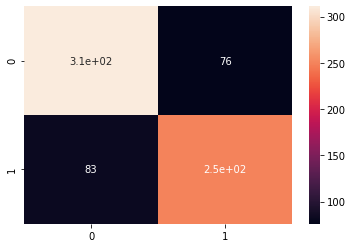

In [174]:
import seaborn as sns
fig=sns.heatmap(cm, annot=True)
fig

In [175]:
#Explanation of confusion Matrix
#311 zeros correctly classified as zeos & at the same time 76 zeros that are actually zeros but model predicted as 1
#250 ones are correctly classifies as 1 & 83 ones are classified as 0

In [176]:
#Normalizing Confusion Matrix
Normalized_cm=cm/cm.sum(axis=1).reshape(-1,1)
Normalized_cm

array([[0.80361757, 0.19638243],
       [0.24924925, 0.75075075]])

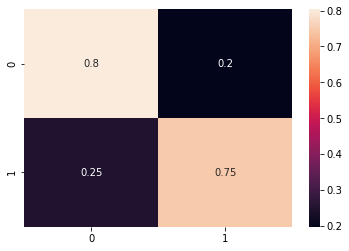

In [177]:
sns.heatmap(Normalized_cm,annot=True)

In [178]:
cm

array([[311,  76],
       [ 83, 250]], dtype=int64)

In [179]:
# Operation on array
cm.sum(axis=0) #adding 311+83 ,76+250


array([394, 326], dtype=int64)

In [180]:
# taking only diagonal elements
np.diag(cm)

array([311, 250], dtype=int64)

In [181]:
# Calulations for any confusion matrix.Manully it is diffult for more classes
FP=cm.sum(axis=0)-np.diag(cm)
FN=cm.sum(axis=1)-np.diag(cm)
TP=np.diag(cm)
TN=cm.sum()-(FP+FN+TP)

In [182]:
#True positive Rate or sensitivity or Recall or hit Rate
TPR=TP/(TP+FN)
print('The True Positive Rate is ',TPR)
print("")
print('The Average True Positive Rate ,Hit rate or sensitivity or Recall is ',TPR.sum()/2)

The True Positive Rate is  [0.80361757 0.75075075]

The Average True Positive Rate ,Hit rate or sensitivity or Recall is  0.7771841609050911


In [183]:
#Explanation of True Positive Rate
#Out of Total [0 and 1] 80% correctly classified as 0 and out of total 75% correctly classified as 1

In [184]:
#Precision or Positive Predictive value
PPV=TP/(TP+FP)
print('The Precision is',PPV)
print('The Average Precision is ',PPV.sum()/2)

The Precision is [0.7893401  0.76687117]
The Average Precision is  0.7781056335835073


In [185]:
#out of Total zeros 78% predicted as correct & out of total 1 76% predicted as 1

In [186]:
#False Positive Rate or alarm rate
FPR=FP/(FP+TN)
print('The False Positive Rate ',FPR)
print('The Average False Positive Rate is ',FPR.sum()/2)

The False Positive Rate  [0.24924925 0.19638243]
The Average False Positive Rate is  0.22281583909490887


In [187]:
#False Negative Rate Or Miss Rate
FNR=FN/(FN+TP)
print('The False Negative Rate',FNR)
print('The Average False Negative Rateis ',FNR.sum()/2)


The False Negative Rate [0.19638243 0.24924925]
The Average False Negative Rateis  0.22281583909490887


In [188]:
#Logaritmic Loss or Log Loss or Cross entropy loss 
# Also Called as Error Metrics
from sklearn.metrics import log_loss
log_loss(y_train,predicted_training_proba)
print('The log Loss on Training is',log_loss(y_train,predicted_training_proba))

The log Loss on Training is 0.4561218471655459


In [189]:
log_loss(y_test,predicted_testing_proba)
print('The log Loss on Testing is',log_loss(y_test,predicted_testing_proba))

The log Loss on Testing is 0.49358753586633086


In [190]:
#HyperParameter Tunning in Logistic Regression
# C-Inverse of regularization Strength
#penlizes the larger value of Paramerters
#Helps to Avoid Overfitting
#Helps to find local minimum to global minimum

In [191]:
#Understanding geomspace & linspace
np.geomspace(1e-5,1e5,num=20)#Uniformaly Distributed in log space

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [192]:
#Understanding geomspace & linspace
np.linspace(1e-5,1e5,num=20)

array([1.00000000e-05, 5.26315790e+03, 1.05263158e+04, 1.57894737e+04,
       2.10526316e+04, 2.63157895e+04, 3.15789474e+04, 3.68421053e+04,
       4.21052632e+04, 4.73684211e+04, 5.26315790e+04, 5.78947368e+04,
       6.31578947e+04, 6.84210526e+04, 7.36842105e+04, 7.89473684e+04,
       8.42105263e+04, 8.94736842e+04, 9.47368421e+04, 1.00000000e+05])

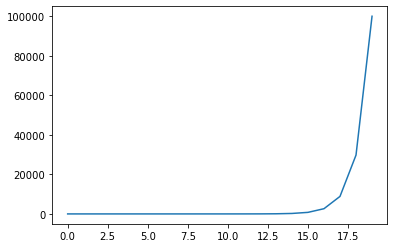

In [193]:
#Visualizing geomspace & linspace
plt.plot(np.geomspace(1e-5,1e5,num=20))

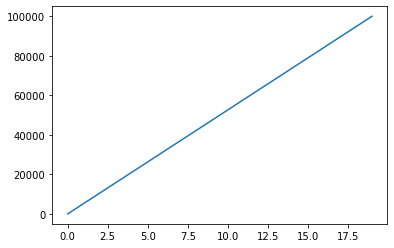

In [194]:
plt.plot(np.linspace(1e-5,1e5,num=20))

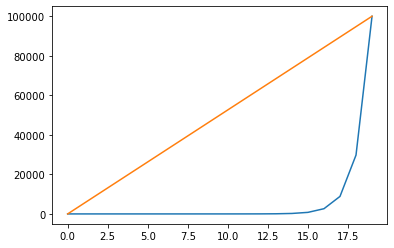

In [195]:
#Combining Both
plt.plot(np.geomspace(1e-5,1e5,num=20))
plt.plot(np.linspace(1e-5,1e5,num=20))


In [196]:
# C values 
c_list=np.geomspace(1e-5,1e5,num=20)
classification_accuracy=[] #Saving the value
logarithmic_loss=[]

for c in c_list:
    model2=LogisticRegression(random_state=10,solver='lbfgs',C=c)
    model2.fit(x_train,y_train)
    score=model2.score(x_test,y_test)
    classification_accuracy.append(score)
    print('The Classification accuracy of c parameter {} is {}'.format(c,score))
    predicted_testing_proba=model2.predict_proba(x_test)
    log_loss2=log_loss(y_test,predicted_testing_proba)
    logarithmic_loss.append(log_loss2)
    print('The log loss of c Parameter {} is {} '.format(c,log_loss2))
    print("")


The Classification accuracy of c parameter 1e-05 is 0.535
The log loss of c Parameter 1e-05 is 0.6962402407697195 

The Classification accuracy of c parameter 3.359818286283781e-05 is 0.54
The log loss of c Parameter 3.359818286283781e-05 is 0.6942639549968309 

The Classification accuracy of c parameter 0.00011288378916846884 is 0.54
The log loss of c Parameter 0.00011288378916846884 is 0.692752630814025 

The Classification accuracy of c parameter 0.000379269019073225 is 0.545
The log loss of c Parameter 0.000379269019073225 is 0.687507944380954 

The Classification accuracy of c parameter 0.0012742749857031334 is 0.64
The log loss of c Parameter 0.0012742749857031334 is 0.6714766139172699 

The Classification accuracy of c parameter 0.004281332398719391 is 0.67
The log loss of c Parameter 0.004281332398719391 is 0.6329923109464188 

The Classification accuracy of c parameter 0.01438449888287663 is 0.725
The log loss of c Parameter 0.01438449888287663 is 0.5733419963610441 

The Clas

C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

The Classification accuracy of c parameter 6.1584821106602545 is 0.76
The log loss of c Parameter 6.1584821106602545 is 0.4947365959567163 

The Classification accuracy of c parameter 20.6913808111479 is 0.77
The log loss of c Parameter 20.6913808111479 is 0.4930782437544778 

The Classification accuracy of c parameter 69.51927961775606 is 0.755
The log loss of c Parameter 69.51927961775606 is 0.4908494646177061 

The Classification accuracy of c parameter 233.57214690901213 is 0.755
The log loss of c Parameter 233.57214690901213 is 0.49414558241880946 

C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h



The Classification accuracy of c parameter 784.7599703514607 is 0.775
The log loss of c Parameter 784.7599703514607 is 0.4874530459194341 

The Classification accuracy of c parameter 2636.6508987303555 is 0.77
The log loss of c Parameter 2636.6508987303555 is 0.4931925962570105 

The Classification accuracy of c parameter 8858.667904100832 is 0.77
The log loss of c Parameter 8858.667904100832 is 0.49322711907658173 

The Classification accuracy of c parameter 29763.51441631313 is 0.77
The log loss of c Parameter 29763.51441631313 is 0.49320162682086943 

The Classification accuracy of c parameter 100000.0 is 0.76
The log loss of c Parameter 100000.0 is 0.49172277920203156 



C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [197]:
#From Above we have to choose one which has lowest logarithmic loss and highest classification accuracy

In [198]:
#Putting results into dataframe

In [199]:
classification_accuracy

[0.535,
 0.54,
 0.54,
 0.545,
 0.64,
 0.67,
 0.725,
 0.705,
 0.745,
 0.745,
 0.75,
 0.76,
 0.77,
 0.755,
 0.755,
 0.775,
 0.77,
 0.77,
 0.77,
 0.76]

In [200]:
#Understanding Making Numpy Array
np.array(classification_accuracy)

array([0.535, 0.54 , 0.54 , 0.545, 0.64 , 0.67 , 0.725, 0.705, 0.745,
       0.745, 0.75 , 0.76 , 0.77 , 0.755, 0.755, 0.775, 0.77 , 0.77 ,
       0.77 , 0.76 ])

In [202]:
logarithmic_loss

[0.6962402407697195,
 0.6942639549968309,
 0.692752630814025,
 0.687507944380954,
 0.6714766139172699,
 0.6329923109464188,
 0.5733419963610441,
 0.5223217514726768,
 0.49871561226941635,
 0.4935207009163183,
 0.49355091962259245,
 0.4947365959567163,
 0.4930782437544778,
 0.4908494646177061,
 0.49414558241880946,
 0.4874530459194341,
 0.4931925962570105,
 0.49322711907658173,
 0.49320162682086943,
 0.49172277920203156]

In [203]:
np.array(logarithmic_loss)

array([0.69624024, 0.69426395, 0.69275263, 0.68750794, 0.67147661,
       0.63299231, 0.573342  , 0.52232175, 0.49871561, 0.4935207 ,
       0.49355092, 0.4947366 , 0.49307824, 0.49084946, 0.49414558,
       0.48745305, 0.4931926 , 0.49322712, 0.49320163, 0.49172278])

In [201]:
np.array(classification_accuracy).reshape(20,)

array([0.535, 0.54 , 0.54 , 0.545, 0.64 , 0.67 , 0.725, 0.705, 0.745,
       0.745, 0.75 , 0.76 , 0.77 , 0.755, 0.755, 0.775, 0.77 , 0.77 ,
       0.77 , 0.76 ])

In [204]:
np.array(logarithmic_loss).reshape(20,)

array([0.69624024, 0.69426395, 0.69275263, 0.68750794, 0.67147661,
       0.63299231, 0.573342  , 0.52232175, 0.49871561, 0.4935207 ,
       0.49355092, 0.4947366 , 0.49307824, 0.49084946, 0.49414558,
       0.48745305, 0.4931926 , 0.49322712, 0.49320163, 0.49172278])

In [205]:
classification_accuracy2=np.array(classification_accuracy).reshape(20,)
logarithmic_loss2=np.array(logarithmic_loss).reshape(20,)


In [209]:
#Zipping
outcomes=zip(c_list,classification_accuracy2,logarithmic_loss2)

In [210]:
df_outcomes=pd.DataFrame(outcomes,columns=['c_list','classification_accuracy','logarithmic_loss'])
df_outcomes

,c_list,classification_accuracy,logarithmic_loss
0,0.000010,0.535,0.696240
1,0.000034,0.540,0.694264
2,0.000113,0.540,0.692753
3,0.000379,0.545,0.687508
4,0.001274,0.640,0.671477
5,0.004281,0.670,0.632992
6,0.014384,0.725,0.573342
7,0.048329,0.705,0.522322
8,0.162378,0.745,0.498716
9,0.545559,0.745,0.493521


In [211]:
df_outcomes.sort_values('logarithmic_loss',ascending=True)

,c_list,classification_accuracy,logarithmic_loss
15,784.759970,0.775,0.487453
13,69.519280,0.755,0.490849
19,100000.000000,0.760,0.491723
12,20.691381,0.770,0.493078
16,2636.650899,0.770,0.493193
18,29763.514416,0.770,0.493202
17,8858.667904,0.770,0.493227
9,0.545559,0.745,0.493521
10,1.832981,0.750,0.493551
14,233.572147,0.755,0.494146


In [212]:
df_outcomes.sort_values('logarithmic_loss',ascending=True).reset_index()

,index,c_list,classification_accuracy,logarithmic_loss
0,15,784.759970,0.775,0.487453
1,13,69.519280,0.755,0.490849
2,19,100000.000000,0.760,0.491723
3,12,20.691381,0.770,0.493078
4,16,2636.650899,0.770,0.493193
5,18,29763.514416,0.770,0.493202
6,17,8858.667904,0.770,0.493227
7,9,0.545559,0.745,0.493521
8,10,1.832981,0.750,0.493551
9,14,233.572147,0.755,0.494146


In [ ]:
#by choosing Optimal C value and rerun the Logistic regression

In [218]:
#Another way of finding best C parameter by using Logistic Regression CV module
from sklearn.model_selection import KFold
cv=KFold(n_splits=3, random_state=0, shuffle=True)

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=cv, random_state=15,Cs=c_list)
clf.fit(x_train,y_train)
print('The Classification Accuracy is :',clf.score(x_test,y_test))
predicted_testing_proba3=clf.predict_proba(x_test)
log_loss3=log_loss(y_test,predicted_testing_proba3)
print('The Logistic Loss is :',log_loss3)
print('The Optimal C parameter is :',clf.C_)

The Classification Accuracy is : 0.775
The Logistic Loss is : 0.49123682916276906
The Optimal C parameter is : [1.83298071]


The Classification accuracy of c parameter 1e-05 is 0.535
The log loss of c Parameter 1e-05 is 0.6962402407697195 



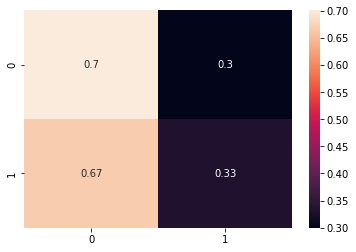

The Classification accuracy of c parameter 3.359818286283781e-05 is 0.54
The log loss of c Parameter 3.359818286283781e-05 is 0.6942639549968309 



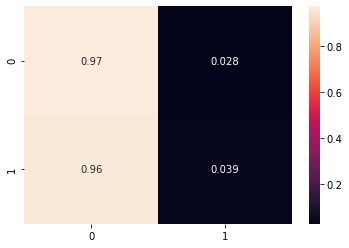

The Classification accuracy of c parameter 0.00011288378916846884 is 0.54
The log loss of c Parameter 0.00011288378916846884 is 0.692752630814025 



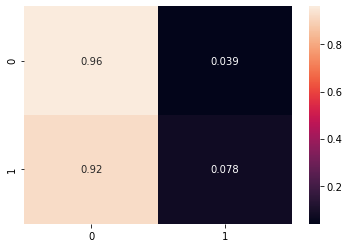

The Classification accuracy of c parameter 0.000379269019073225 is 0.545
The log loss of c Parameter 0.000379269019073225 is 0.687507944380954 



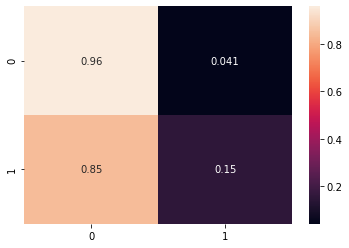

The Classification accuracy of c parameter 0.0012742749857031334 is 0.64
The log loss of c Parameter 0.0012742749857031334 is 0.6714766139172699 



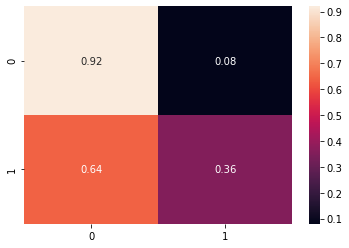

The Classification accuracy of c parameter 0.004281332398719391 is 0.67
The log loss of c Parameter 0.004281332398719391 is 0.6329923109464188 



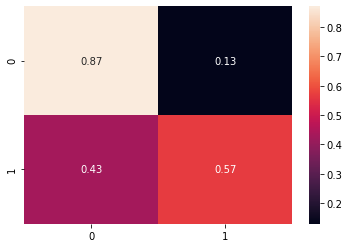

The Classification accuracy of c parameter 0.01438449888287663 is 0.725
The log loss of c Parameter 0.01438449888287663 is 0.5733419963610441 



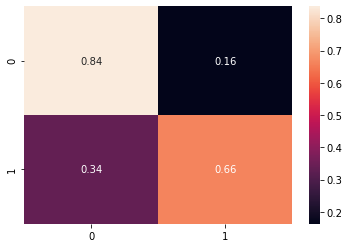

The Classification accuracy of c parameter 0.04832930238571752 is 0.705
The log loss of c Parameter 0.04832930238571752 is 0.5223217514726768 



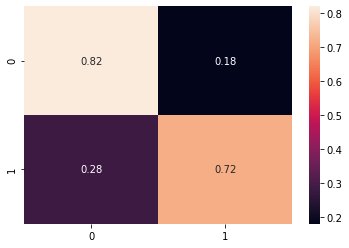

The Classification accuracy of c parameter 0.1623776739188721 is 0.745
The log loss of c Parameter 0.1623776739188721 is 0.49871561226941635 



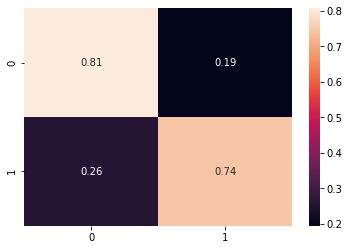

The Classification accuracy of c parameter 0.5455594781168515 is 0.745
The log loss of c Parameter 0.5455594781168515 is 0.4935207009163183 



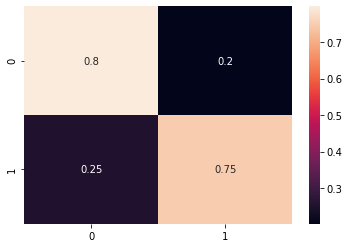

The Classification accuracy of c parameter 1.8329807108324339 is 0.75
The log loss of c Parameter 1.8329807108324339 is 0.49355091962259245 



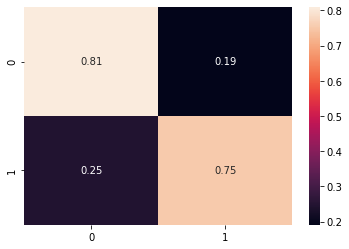

C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Classification accuracy of c parameter 6.1584821106602545 is 0.76
The log loss of c Parameter 6.1584821106602545 is 0.4947365959567163 



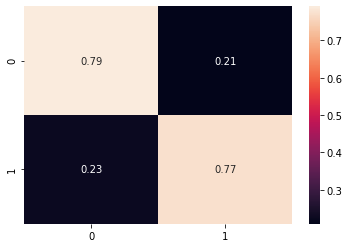

The Classification accuracy of c parameter 20.6913808111479 is 0.77
The log loss of c Parameter 20.6913808111479 is 0.4930782437544778 



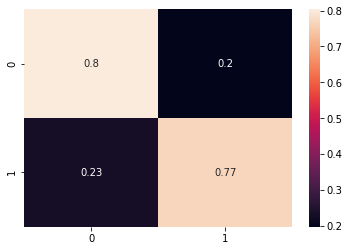

The Classification accuracy of c parameter 69.51927961775606 is 0.755
The log loss of c Parameter 69.51927961775606 is 0.4908494646177061 



C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


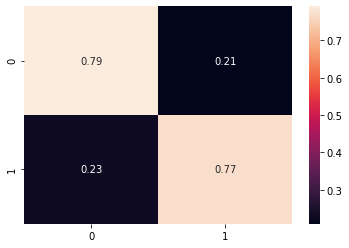

The Classification accuracy of c parameter 233.57214690901213 is 0.755
The log loss of c Parameter 233.57214690901213 is 0.49414558241880946 



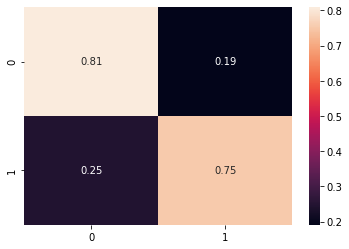

C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Classification accuracy of c parameter 784.7599703514607 is 0.775
The log loss of c Parameter 784.7599703514607 is 0.4874530459194341 



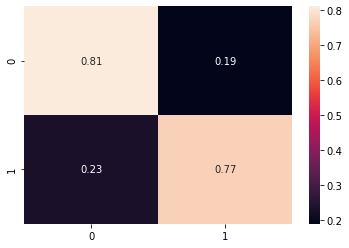

The Classification accuracy of c parameter 2636.6508987303555 is 0.77
The log loss of c Parameter 2636.6508987303555 is 0.4931925962570105 



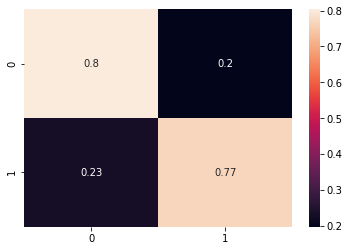

The Classification accuracy of c parameter 8858.667904100832 is 0.77
The log loss of c Parameter 8858.667904100832 is 0.49322711907658173 



C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


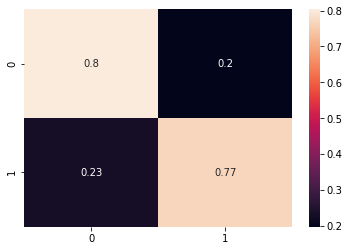

The Classification accuracy of c parameter 29763.51441631313 is 0.77
The log loss of c Parameter 29763.51441631313 is 0.49320162682086943 



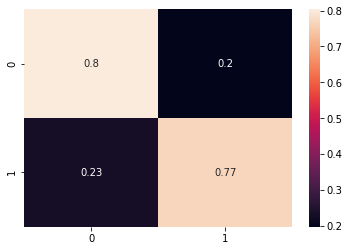

The Classification accuracy of c parameter 100000.0 is 0.76
The log loss of c Parameter 100000.0 is 0.49172277920203156 



C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


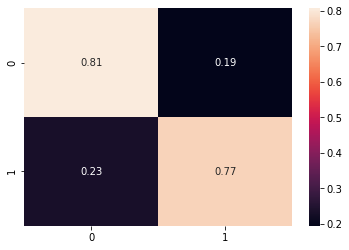

In [221]:
#plotting confusion matrix for each c parameter
c_list=np.geomspace(1e-5,1e5,num=20)
classification_accuracy=[] #Saving the value
logarithmic_loss=[]

for c in c_list:
    model2=LogisticRegression(random_state=10,solver='lbfgs',C=c)
    model2.fit(x_train,y_train)
    score=model2.score(x_test,y_test)
    classification_accuracy.append(score)
    print('The Classification accuracy of c parameter {} is {}'.format(c,score))
    predicted_testing_proba=model2.predict_proba(x_test)
    log_loss2=log_loss(y_test,predicted_testing_proba)
    logarithmic_loss.append(log_loss2)
    print('The log loss of c Parameter {} is {} '.format(c,log_loss2))
    print("")

    y_predicted=model2.predict(x_train)
    cm=confusion_matrix(y_train, y_predicted)
    Normalized_cm=cm/cm.sum(axis=1).reshape(-1,1)
    sns.heatmap(Normalized_cm,annot=True)
    plt.show()


In [225]:
#Training a Dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train,y_train)
score=dummy_clf.score(x_test,y_test)

predicted_testing_proba=dummy_clf.predict_proba(x_test)
log_loss2=log_loss(y_test,predicted_testing_proba)
print('The Testing Accuracy is:',score)
print('The Log loss is:',log_loss2)


The Testing Accuracy is: 0.53
The Log loss is: 16.233224905608022


In [226]:
#Final Model with selected Parameters 
#on unseen data
model3=LogisticRegression(random_state=10,solver='lbfgs',C=784.759970)
model3.fit(x_train,y_train)
score=model3.score(x_validate,y_validate)

predicted_testing_proba=model3.predict_proba(x_validate)
log_loss3=log_loss(y_validate,predicted_testing_proba)
print('The Testing Accuracy is:',score)
print('The Log loss is:',log_loss3)




The Testing Accuracy is: 0.7625
The Log loss is: 0.4331431851407629


C:\Users\Lokanathswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
